In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
df = pd.read_excel('../data/Educacion_01.xlsx',skiprows = range(0, 3))

In [3]:
df.head()

,Entidad federativa,Total,Sabe leer y escribir,No sabe leer y escribir,No especificado
0,Estados Unidos Mexicanos,19529018.0,17554529.0,1871713.0,102776.0
1,Aguascalientes,234498.0,216002.0,17770.0,726.0
2,Baja California,553060.0,495977.0,52605.0,4478.0
3,Baja California Sur,121220.0,107786.0,12780.0,654.0
4,Campeche,145473.0,129890.0,14959.0,624.0


In [4]:
df.rename(columns = {'Entidad federativa': 'state', 'Sabe leer y escribir': 'read_write', 'No sabe leer y escribir': 'not_read_write', 'No especificado': 'not_specified'}, inplace=True)

In [5]:
df.query("state != 'Estados Unidos Mexicanos'", inplace=True)
df.head()

,state,Total,read_write,not_read_write,not_specified
1,Aguascalientes,234498.0,216002.0,17770.0,726.0
2,Baja California,553060.0,495977.0,52605.0,4478.0
3,Baja California Sur,121220.0,107786.0,12780.0,654.0
4,Campeche,145473.0,129890.0,14959.0,624.0
5,Coahuila de Zaragoza,486221.0,445183.0,39038.0,2000.0


In [6]:
df['pct_read_write']=(df['read_write']/df['Total'])*100

In [7]:
df.head()

,state,Total,read_write,not_read_write,not_specified,pct_read_write
1,Aguascalientes,234498.0,216002.0,17770.0,726.0,92.112513
2,Baja California,553060.0,495977.0,52605.0,4478.0,89.678697
3,Baja California Sur,121220.0,107786.0,12780.0,654.0,88.917670
4,Campeche,145473.0,129890.0,14959.0,624.0,89.288047
5,Coahuila de Zaragoza,486221.0,445183.0,39038.0,2000.0,91.559805


In [8]:
df['pct_not_read_write']=(df['not_read_write']/df['Total'])*100

In [9]:
df.head()

,state,Total,read_write,not_read_write,not_specified,pct_read_write,pct_not_read_write
1,Aguascalientes,234498.0,216002.0,17770.0,726.0,92.112513,7.577890
2,Baja California,553060.0,495977.0,52605.0,4478.0,89.678697,9.511626
3,Baja California Sur,121220.0,107786.0,12780.0,654.0,88.917670,10.542815
4,Campeche,145473.0,129890.0,14959.0,624.0,89.288047,10.283008
5,Coahuila de Zaragoza,486221.0,445183.0,39038.0,2000.0,91.559805,8.028859


In [10]:
df['state'] = df['state'].str.upper()

In [11]:
df = df.iloc[0:32,:].copy()
df.sort_values(by=['state'], ascending = True, inplace=True)
df.at[9,'state']='DISTRITO FEDERAL'
df.at[5,'state']='COAHUILA'
df.at[15,'state']='MEXICO'
df.at[16,'state']='MICHOACAN'
df.at[30,'state']='VERACRUZ'
df.at[22,'state']='QUERETARO'
df.at[24,'state']='SAN LUIS POTOSI'
df.at[31,'state']='YUCATAN'
df.at[19,'state']='NUEVO LEON'

df.sort_values(by=['state'], ascending = True, inplace=True)
df = df.loc[:,['state','pct_read_write','pct_not_read_write']].copy()
#plt.figure(figsize=(14,10))
#sns.pairplot(df[['pct_read_write', 'pct_not_read_write']]);
#df[['pct_read_write', 'pct_not_read_write']].describe()


In [12]:
dfWeek1 = pd.read_csv('../data/week1analyzes.csv')

In [13]:
dfWeek1

,state,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,AGUASCALIENTES,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
1,BAJA CALIFORNIA,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
2,BAJA CALIFORNIA SUR,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
3,CAMPECHE,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
4,CHIAPAS,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
5,CHIHUAHUA,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
6,COAHUILA,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
7,COLIMA,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
8,DISTRITO FEDERAL,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
9,DURANGO,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


In [14]:
dfAll = pd.merge(df,dfWeek1,on='state')
df.shape

(32, 3)

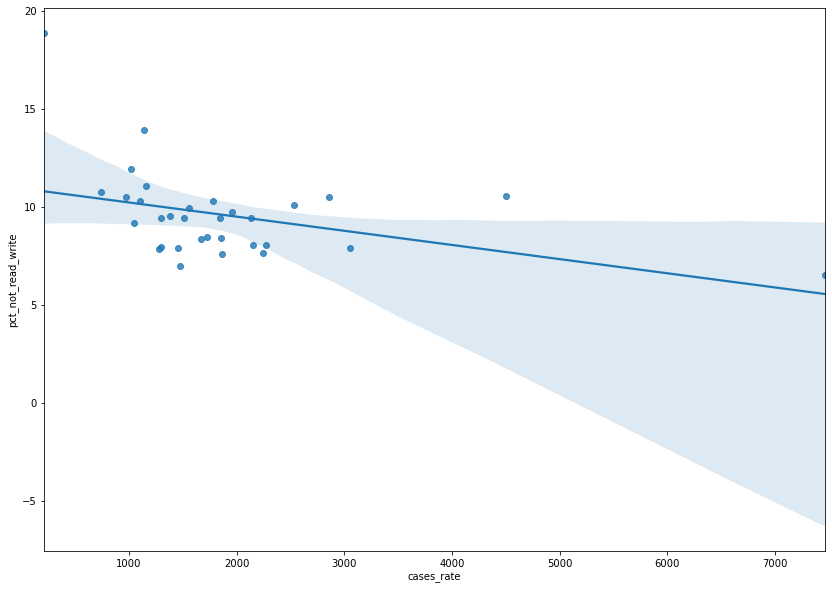

In [15]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="pct_not_read_write", data=dfAll)
sns.set_context('paper', font_scale=2)

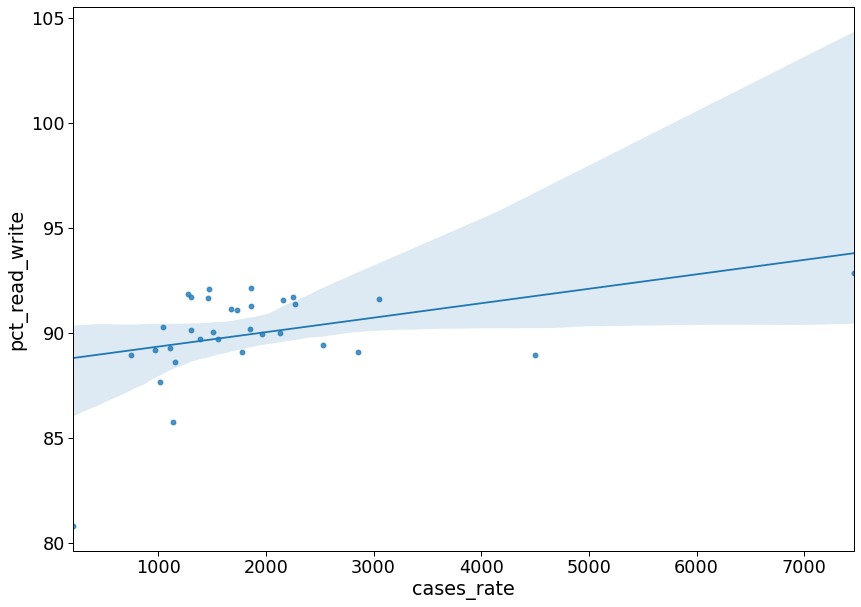

In [16]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="pct_read_write", data=dfAll)
sns.set_context('paper', font_scale=2)

In [17]:
df2 = pd.read_excel('../data/Educacion_05.xlsx',skiprows = range(0, 4))
df2.rename(columns = {'Entidad federativa': 'state', 'Total': 'average_years_finish'}, inplace=True)
df2.query("state != 'Estados Unidos Mexicanos'", inplace=True)
df2 = df2.iloc[0:32,:].copy()
df2['state'] = df2['state'].str.upper()
df.sort_values(by=['state'], ascending = True, inplace=True)
df2.at[9,'state']='DISTRITO FEDERAL'
df2.at[5,'state']='COAHUILA'
df2.at[15,'state']='MEXICO'
df2.at[16,'state']='MICHOACAN'
df2.at[30,'state']='VERACRUZ'
df2.at[22,'state']='QUERETARO'
df2.at[24,'state']='SAN LUIS POTOSI'
df2.at[31,'state']='YUCATAN'
df2.at[19,'state']='NUEVO LEON'
df2.sort_values(by=['state'], ascending = True, inplace=True)
df2 = df2.loc[:,'state':'average_years_finish'].copy()
df2

,state,average_years_finish
1,AGUASCALIENTES,10.35
2,BAJA CALIFORNIA,10.20
3,BAJA CALIFORNIA SUR,10.34
4,CAMPECHE,9.63
7,CHIAPAS,7.78
8,CHIHUAHUA,10.00
5,COAHUILA,10.43
6,COLIMA,10.05
9,DISTRITO FEDERAL,11.48
10,DURANGO,9.75


In [18]:
dfAll2 = pd.merge(df2,dfWeek1,on='state')
dfAll2

,state,average_years_finish,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,AGUASCALIENTES,10.35,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
1,BAJA CALIFORNIA,10.20,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
2,BAJA CALIFORNIA SUR,10.34,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
3,CAMPECHE,9.63,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
4,CHIAPAS,7.78,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
5,CHIHUAHUA,10.00,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
6,COAHUILA,10.43,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
7,COLIMA,10.05,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
8,DISTRITO FEDERAL,11.48,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
9,DURANGO,9.75,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


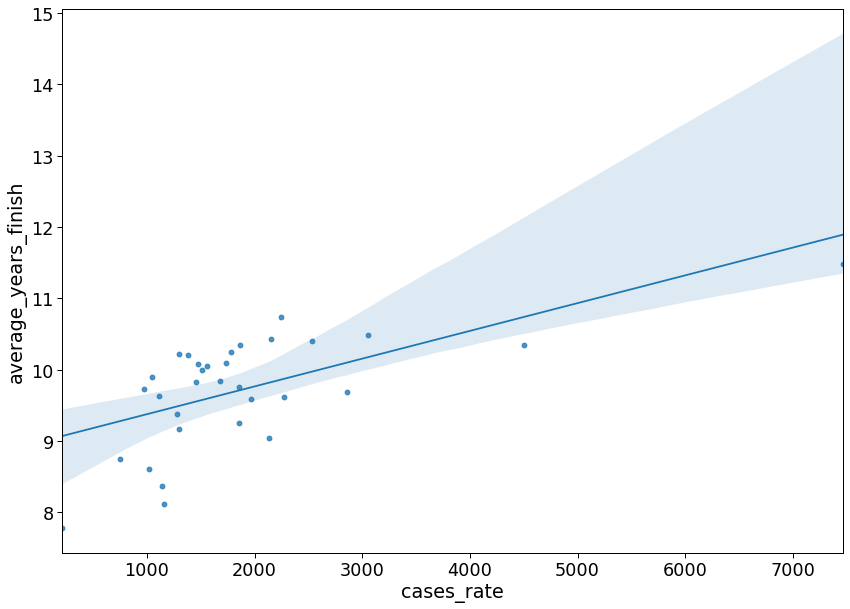

In [19]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="average_years_finish", data=dfAll2)
sns.set_context('paper', font_scale=2)

In [20]:
df3 = pd.read_excel('../data/Vivienda_02.xlsx',skiprows = range(0, 3))
df3.rename(columns = {'Entidad federativa': 'state', '2020': 'household_size'}, inplace=True)
df3.query("state != 'Estados Unidos Mexicanos'", inplace=True)
df3 = df3.iloc[0:32,:].copy()
df3['state'] = df3['state'].str.upper()
df3.sort_values(by=['state'], ascending = True, inplace=True)
df3.at[9,'state']='DISTRITO FEDERAL'
df3.at[5,'state']='COAHUILA'
df3.at[15,'state']='MEXICO'
df3.at[16,'state']='MICHOACAN'
df3.at[30,'state']='VERACRUZ'
df3.at[22,'state']='QUERETARO'
df3.at[24,'state']='SAN LUIS POTOSI'
df3.at[31,'state']='YUCATAN'
df3.at[19,'state']='NUEVO LEON'
df3.sort_values(by=['state'], ascending = True, inplace=True)
df3 = df3.loc[:,['state','household_size']].copy()

In [21]:
dfAll3 = pd.merge(df3,dfWeek1,on='state')

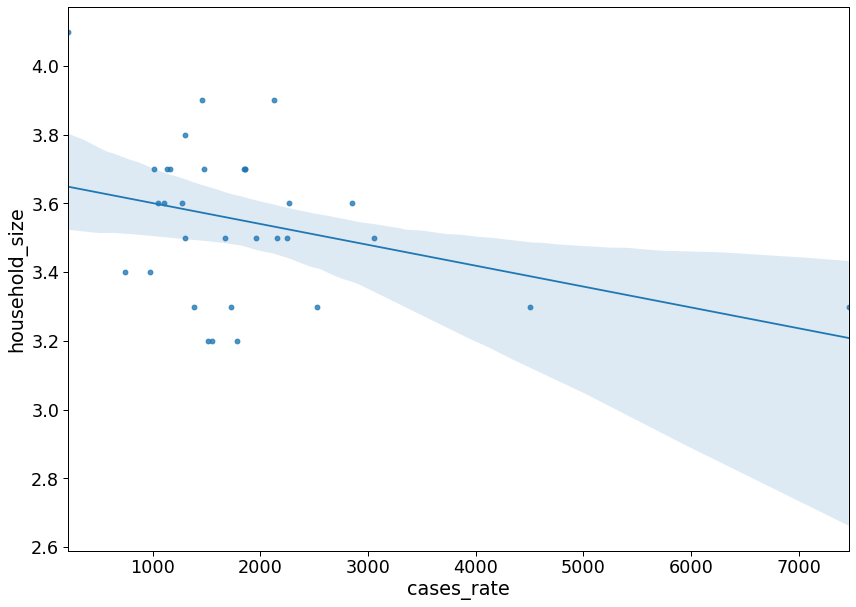

In [22]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="household_size", data=dfAll3)
sns.set_context('paper', font_scale=2)

In [23]:
df4 = pd.read_excel('../data/Mental_05.xlsx',skiprows = range(0, 4))
df4.rename(columns = {'Entidad federativa': 'state', 'Casos seleccionados': 'mental_disease', 'Total': 'depresion_rate'}, inplace=True)
df4.query("state != 'Estados Unidos Mexicanos'", inplace=True)
df4.query("mental_disease != 'Anorexia y bulimia'", inplace=True)
df4 = df4.iloc[0:32,:].copy()
df4['state'] = df4['state'].str.upper()
df.sort_values(by=['state'], ascending = True, inplace=True)
df4.at[18,'state']='DISTRITO FEDERAL'
df4.at[10,'state']='COAHUILA'
df4.at[30,'state']='MEXICO'
df4.at[32,'state']='MICHOACAN'
df4.at[60,'state']='VERACRUZ'
df4.at[22,'state']='QUERETARO'
df4.at[44,'state']='SAN LUIS POTOSI'
df4.at[62,'state']='YUCATAN'
df4.at[28,'state']='NUEVO LEON'
df4.sort_values(by=['state'], ascending = True, inplace=True)
df4

,state,mental_disease,depresion_rate,Hombres,Mujeres
2,AGUASCALIENTES,Depresión,122.51,62.97,180.29
4,BAJA CALIFORNIA,Depresión,126.73,72.03,181.36
6,BAJA CALIFORNIA SUR,Depresión,109.76,53.40,168.05
8,CAMPECHE,Depresión,120.32,65.00,174.40
14,CHIAPAS,Depresión,22.06,10.10,33.50
16,CHIHUAHUA,Depresión,291.42,174.02,406.90
10,COAHUILA,Depresión,57.28,29.79,84.65
12,COLIMA,Depresión,212.20,90.24,332.98
18,DISTRITO FEDERAL,Depresión,219.61,123.05,307.93
20,DURANGO,Depresión,261.31,123.00,395.62


In [24]:
dfAll4 = pd.merge(df4,dfWeek1)
dfAll4

,state,mental_disease,depresion_rate,Hombres,Mujeres,population,total_cases,cases_rate,cases_rate_last_60_days,total_deaths,deaths_rate,deaths_rate_last_60_days
0,AGUASCALIENTES,Depresión,122.51,62.97,180.29,1434635,26694,1860.682334,55.275384,2456,171.193370,5.924852
1,BAJA CALIFORNIA,Depresión,126.73,72.03,181.36,3634868,50278,1383.213916,64.624080,8648,237.917856,4.786969
2,BAJA CALIFORNIA SUR,Depresión,109.76,53.40,168.05,804708,36223,4501.384353,778.667542,1486,184.663257,14.415167
3,CAMPECHE,Depresión,120.32,65.00,174.40,1000617,11081,1107.416724,162.699614,1265,126.421998,5.596547
4,CHIAPAS,Depresión,22.06,10.10,33.50,5730367,12050,210.283216,19.108724,1654,28.863771,0.715486
5,CHIHUAHUA,Depresión,291.42,174.02,406.90,3801487,57483,1512.118810,119.505867,7493,197.107079,10.758948
6,COAHUILA,Depresión,57.28,29.79,84.65,3218720,69382,2155.577372,41.755729,6376,198.091167,2.081573
7,COLIMA,Depresión,212.20,90.24,332.98,785153,12203,1554.219369,130.547804,1210,154.110091,4.330366
8,DISTRITO FEDERAL,Depresión,219.61,123.05,307.93,9018645,673343,7466.121574,360.187146,34458,382.075134,7.096410
9,DURANGO,Depresión,261.31,123.00,395.62,1868996,34588,1850.619263,63.403025,2495,133.494133,3.691822


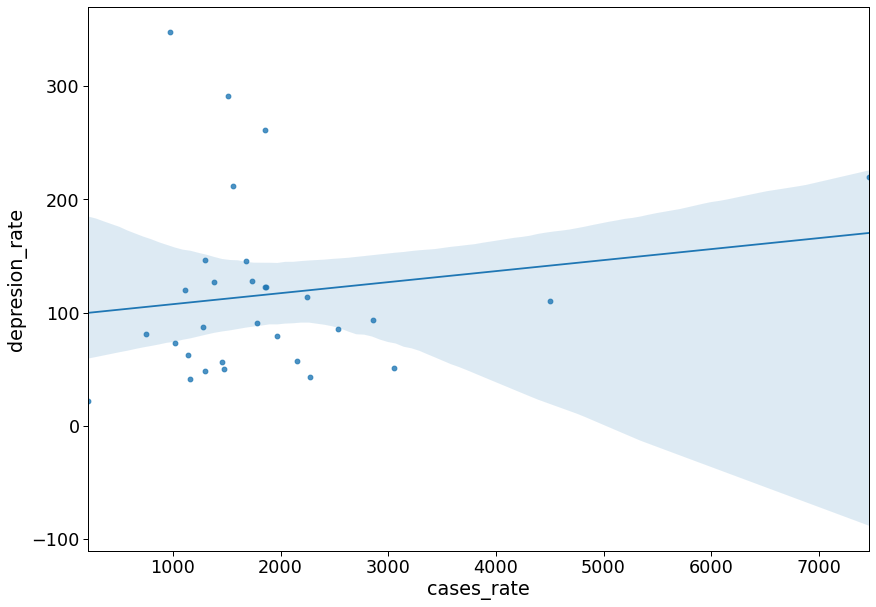

In [25]:
plt.figure(figsize=(14,10))
sns.regplot(x="cases_rate", y="depresion_rate", data=dfAll4)
sns.set_context('paper', font_scale=2)

In [26]:
dfFinal=pd.merge(df,dfWeek1,on='state')
dfFinal=pd.merge(dfFinal,df2,on='state')
dfFinal=pd.merge(dfFinal,df3,on='state')

<Figure size 1440x1440 with 0 Axes>

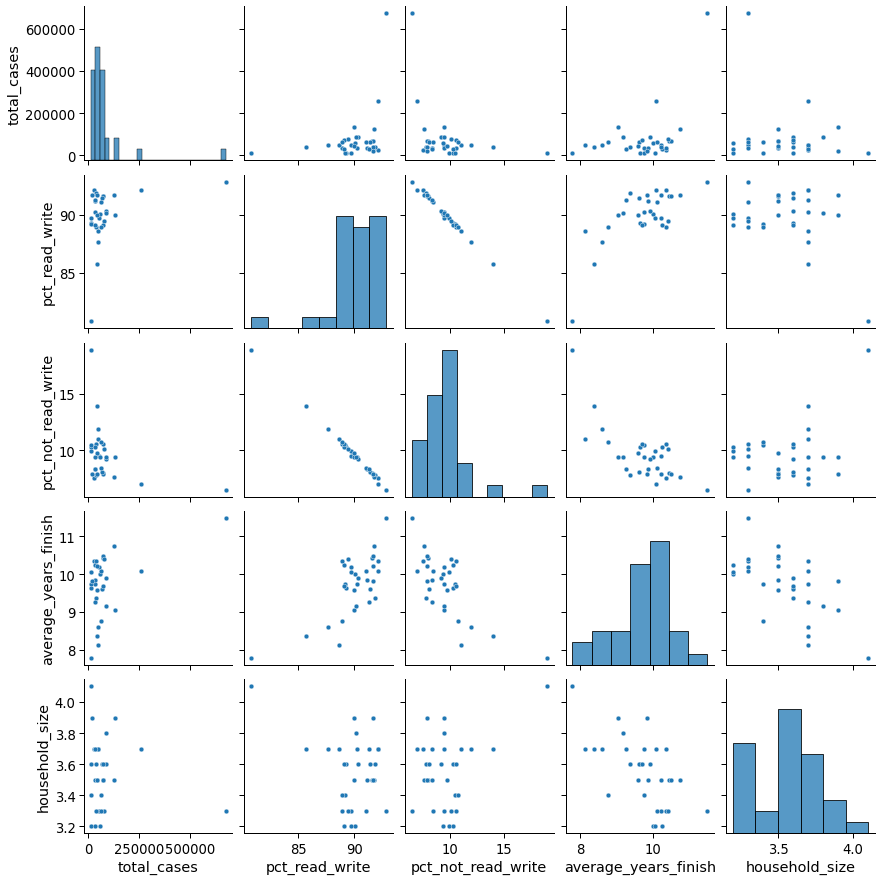

In [27]:
plt.figure(figsize=(20,20))
dfFinalTest = dfFinal.loc[:,['total_cases','pct_read_write','pct_not_read_write','average_years_finish','household_size']].copy()
sns.set_context('paper', font_scale=1.5)
pairplot = sns.pairplot(dfFinalTest)
#pairplot = pairplot.get_figure()

#pairplot.savefig("../results/pairplot.png")

In [28]:
corr = dfFinal.corr()

In [29]:
mask = np.triu(np.ones_like(corr, dtype=bool))

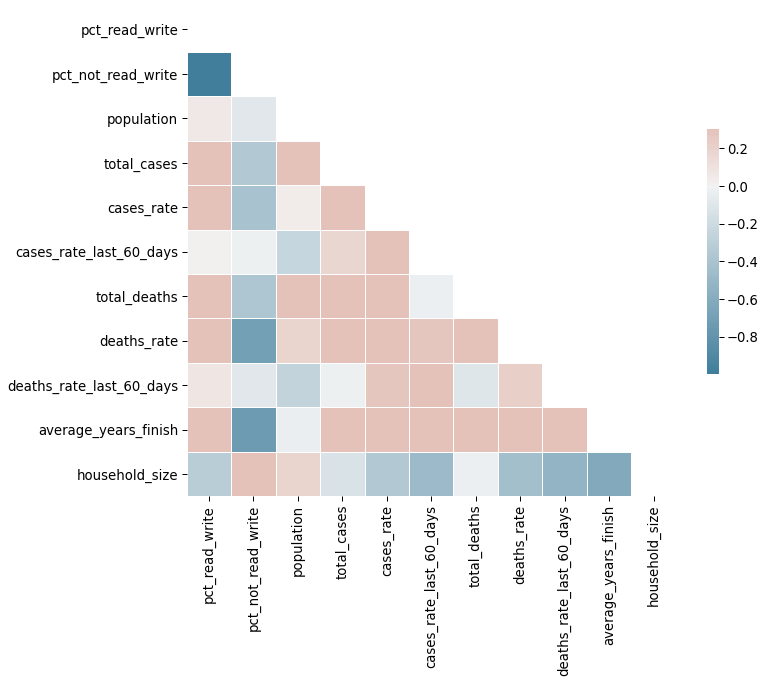

In [30]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
heatmap=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.set_context('paper', font_scale=0.5)
heatmap = heatmap.get_figure()
#heatmap.savefig("../results/heatmap.png")